In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv('crop_yield.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [3]:
df.shape

(19689, 10)

In [4]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [5]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [6]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [7]:
df.nunique()

Crop                  55
Crop_Year             24
Season                 6
State                 30
Area               13644
Production         14016
Annual_Rainfall      634
Fertilizer         18598
Pesticide          17405
Yield              13551
dtype: int64

In [8]:
df.dtypes

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

In [9]:
df['Season'].unique()

array(['Whole Year ', 'Kharif     ', 'Rabi       ', 'Autumn     ',
       'Summer     ', 'Winter     '], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

Yield_Crop_encoder = LabelEncoder()
Yield_Season_encoder = LabelEncoder()
Yield_State_encoder = LabelEncoder()
df['Crop'] = Yield_Crop_encoder.fit_transform(df['Crop'])
df['Season'] = Yield_Season_encoder.fit_transform(df['Season'])
df['State'] = Yield_State_encoder.fit_transform(df['State'])

In [11]:
joblib.dump(Yield_Crop_encoder,'Yield_Crop_encoder.pkl')


['Yield_Crop_encoder.pkl']

In [12]:
joblib.dump(Yield_Season_encoder,'Yield_Season_encoder.pkl')

['Yield_Season_encoder.pkl']

In [13]:
joblib.dump(Yield_State_encoder,'Yield_State_encoder.pkl')

['Yield_State_encoder.pkl']

In [14]:
croptype_dict = {}
for i in range(len(df["Crop"].unique())):
    croptype_dict[i] = Yield_Crop_encoder.inverse_transform([i])[0]
print(croptype_dict)

seasontype_dict = {}
for i in range(len(df["Season"].unique())):
    seasontype_dict[i] = Yield_Season_encoder.inverse_transform([i])[0]
print(seasontype_dict)

statetype_dict = {}
for i in range(len(df["State"].unique())):
    statetype_dict[i] = Yield_State_encoder.inverse_transform([i])[0]
print(statetype_dict)

{0: 'Arecanut', 1: 'Arhar/Tur', 2: 'Bajra', 3: 'Banana', 4: 'Barley', 5: 'Black pepper', 6: 'Cardamom', 7: 'Cashewnut', 8: 'Castor seed', 9: 'Coconut ', 10: 'Coriander', 11: 'Cotton(lint)', 12: 'Cowpea(Lobia)', 13: 'Dry chillies', 14: 'Garlic', 15: 'Ginger', 16: 'Gram', 17: 'Groundnut', 18: 'Guar seed', 19: 'Horse-gram', 20: 'Jowar', 21: 'Jute', 22: 'Khesari', 23: 'Linseed', 24: 'Maize', 25: 'Masoor', 26: 'Mesta', 27: 'Moong(Green Gram)', 28: 'Moth', 29: 'Niger seed', 30: 'Oilseeds total', 31: 'Onion', 32: 'Other  Rabi pulses', 33: 'Other Cereals', 34: 'Other Kharif pulses', 35: 'Other Summer Pulses', 36: 'Peas & beans (Pulses)', 37: 'Potato', 38: 'Ragi', 39: 'Rapeseed &Mustard', 40: 'Rice', 41: 'Safflower', 42: 'Sannhamp', 43: 'Sesamum', 44: 'Small millets', 45: 'Soyabean', 46: 'Sugarcane', 47: 'Sunflower', 48: 'Sweet potato', 49: 'Tapioca', 50: 'Tobacco', 51: 'Turmeric', 52: 'Urad', 53: 'Wheat', 54: 'other oilseeds'}
{0: 'Autumn     ', 1: 'Kharif     ', 2: 'Rabi       ', 3: 'Summer  

In [15]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,1997,4,2,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,1,1997,1,2,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,8,1997,1,2,796.0,22,2051.4,75755.32,246.76,0.238333
3,9,1997,4,2,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,11,1997,1,2,1739.0,794,2051.4,165500.63,539.09,0.420909


In [16]:
df.describe()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,19689.000000,19689.000000,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,29.357662,2009.127584,2.037381,14.328813,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,15.560857,6.498099,1.222513,9.000461,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,0.000000,1997.000000,0.000000,0.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,17.000000,2004.000000,1.000000,7.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,31.000000,2010.000000,2.000000,14.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,43.000000,2015.000000,3.000000,22.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,54.000000,2020.000000,5.000000,29.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [17]:
df.dtypes

Crop                 int32
Crop_Year            int64
Season               int32
State                int32
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

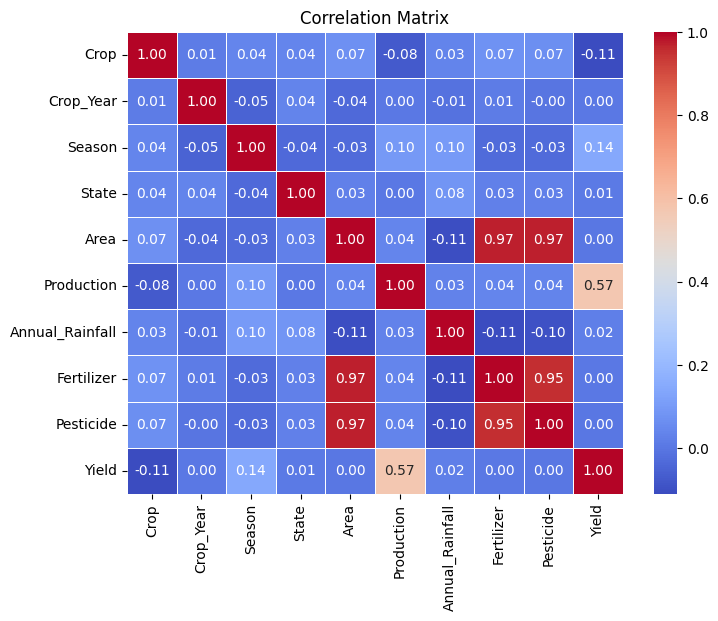

In [18]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [19]:
X = df.drop(['Yield','Crop_Year'],axis = 1)
Y = df['Yield']

In [20]:
X.shape

(19689, 8)

In [21]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size = 0.2,random_state = 20)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2_rf}')


Mean Squared Error: 5112.652571359805
R-squared: 0.9932286835447696


In [25]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Mean Squared Error: {mse_xgb}')
print(f'R-squared: {r2_xgb}')


Mean Squared Error: 9526.915293437285
R-squared: 0.9873823309145998


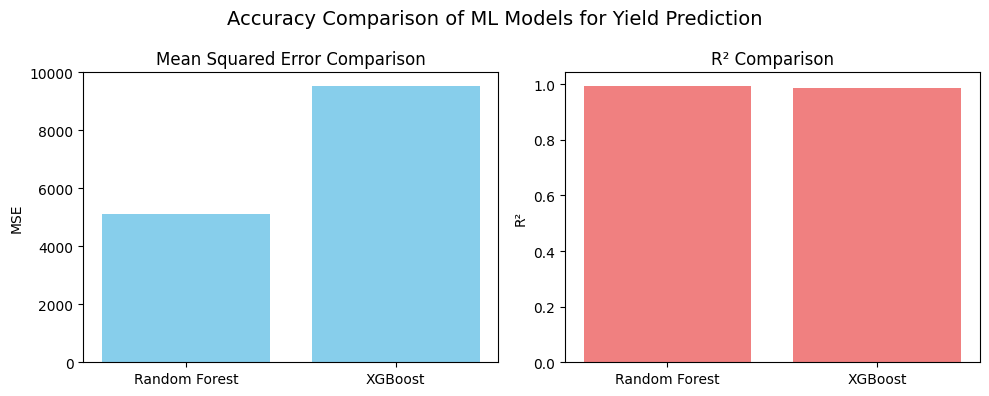

In [30]:
models = [ 'Random Forest', 'XGBoost']

# MSE and R2 values
mse_values = [ mse_rf, mse_xgb]
r2_values = [r2_rf, r2_xgb]

# Create a figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot MSE
fig.suptitle('Accuracy Comparison of ML Models for Yield Prediction', fontsize=14)
ax[0].bar(models, mse_values, color='skyblue')
ax[0].set_title('Mean Squared Error Comparison')
ax[0].set_ylabel('MSE')

# Plot R²
ax[1].bar(models, r2_values, color='lightcoral')
ax[1].set_title('R² Comparison')
ax[1].set_ylabel('R²')

plt.tight_layout()
plt.show()


In [42]:
joblib.dump(rf_model,'Yield.pkl')

['Yield.pkl']